In [54]:
import pandas as pd
import pickle
import json
import matplotlib.pyplot as plt

### Reading the base data and GPT evaluations

In [2]:
with open('response_generation_data/all_model_responses.pkl', 'rb') as file:
    all_model_responses = pickle.load(file)

all_model_responses.head()

,topic,question,answerText,gpt_responses_base,gpt_responses_ft,llama_responses_base,llama_responses_ft
0,relationships,I had to go to the emergency room today to get...,It is extremely frustrating when our significa...,I'm sorry to hear about your experience. It's ...,Be straightforward with how you felt at that s...,It's completely understandable that you're fee...,The only way your boyfriend will see your poin...
1,marriage,What makes a healthy marriage last? What makes...,"This is a fantastic question. In one sentence,...",A healthy and lasting marriage often hinges on...,"What a happy, healthy marriage looks or feels ...",A healthy marriage is built on a foundation of...,There are many different ways to answer this q...
2,relationships,"I'm a female freshman in high school, and this...","First off, I think it is great that you are wi...",It's great that you want to support your frien...,Hi there. It sounds like you care a lot for Ti...,I'm glad you're taking the initiative to suppo...,Hi. I love your thoughtful question! I'm glad ...
3,intimacy,"My wife and I are newly married, about 2 month...","You are newly married, you Have a hectic sched...",Navigating intimacy issues in a new marriage c...,You have most of the knowledge you need alread...,I can sense the frustration and concern in you...,It sounds like you have a lot of emotional int...
4,legal-regulatory,"I think I have depression, anxiety, bipolar di...",It can be difficult to get counseling if you d...,I'm sorry to hear you're going through this. I...,There are a number of resources you can utiliz...,I'm so sorry to hear that you're struggling wi...,"Hi Colorado, I'm sorry to hear that your mom i..."


In [3]:
df_response_evaluation = pd.DataFrame(all_model_responses['topic'])

In [4]:
with open('response_evaluation_data/original_responses_eval.pkl', 'rb') as file:
    original_responses_eval = pickle.load(file)
    
agenda = []
feedback  = []
understanding = []
interpersonal_effectiveness = []
collaboration = []
pacing_time = []
guided_discovery = []
focus_cognition = []
strategy_change = []
cognitive_behavorial = []
homework = []


for index, response in enumerate(original_responses_eval):
    response = response.replace('json','').replace("```",'')
    try:
        json_response = json.loads(response)
        agenda.append(json_response['AGENDA'])
        feedback.append(json_response['FEEDBACK'])
        understanding.append(json_response['UNDERSTANDING'])
        interpersonal_effectiveness.append(json_response['INTERPERSONAL EFFECTIVENESS'])
        collaboration.append(json_response['COLLABORATION'])
        
        #Pacing time has different keys in different responses. So checking for that
        if 'PACING AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        elif 'PACED AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACED AND EFFICIENT USE OF TIME'])
        elif ' pacing and efficient use of time' in json_response:
            pacing_time.append(json_response[' pacing and efficient use of time'])
        elif 'PACINGS AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACINGS AND EFFICIENT USE OF TIME'])
        else:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        guided_discovery.append(json_response['GUIDED DISCOVERY'])
        focus_cognition.append(json_response['FOCUSING ON KEY COGNITIONS OR BEHAVIORS'])
        strategy_change.append(json_response['STRATEGY FOR CHANGE'])
        cognitive_behavorial.append(json_response['APPLICATION OF COGNITIVE-BEHAVIORAL TECHNIQUES'])
        homework.append(json_response['HOMEWORK'])
    except:
        print(index)
        agenda.append(None)
        feedback.append(None)
        understanding.append(None)
        interpersonal_effectiveness.append(None)
        collaboration.append(None)
        pacing_time.append(None)
        guided_discovery.append(None)
        focus_cognition.append(None)
        strategy_change.append(None)
        cognitive_behavorial.append(None)
        homework.append(None)

df_response_evaluation['understanding_orig'] = understanding
df_response_evaluation['interpersonal_effectiveness_orig'] = interpersonal_effectiveness
df_response_evaluation['collaboration_orig'] = collaboration
df_response_evaluation['guided_discovery_orig'] = guided_discovery
df_response_evaluation['focus_cognition_orig'] = focus_cognition
df_response_evaluation['strategy_change_orig'] = strategy_change
df_response_evaluation.head()

,topic,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig
0,relationships,4,4,2,3,4,4
1,marriage,4,4,2,4,4,4
2,relationships,4,4,4,4,4,4
3,intimacy,4,4,4,4,4,4
4,legal-regulatory,4,4,4,4,4,4


In [5]:
with open('response_evaluation_data/llama_base_responses_eval.pkl', 'rb') as file:
    llama_base_responses_eval = pickle.load(file)
    
agenda = []
feedback  = []
understanding = []
interpersonal_effectiveness = []
collaboration = []
pacing_time = []
guided_discovery = []
focus_cognition = []
strategy_change = []
cognitive_behavorial = []
homework = []


for index, response in enumerate(llama_base_responses_eval):
    response = response.replace('json','').replace("```",'')
    try:
        json_response = json.loads(response)
        agenda.append(json_response['AGENDA'])
        feedback.append(json_response['FEEDBACK'])
        understanding.append(json_response['UNDERSTANDING'])
        interpersonal_effectiveness.append(json_response['INTERPERSONAL EFFECTIVENESS'])
        collaboration.append(json_response['COLLABORATION'])
        
        #Pacing time has different keys in different responses. So checking for that
        if 'PACING AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        elif 'PACED AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACED AND EFFICIENT USE OF TIME'])
        elif ' pacing and efficient use of time' in json_response:
            pacing_time.append(json_response[' pacing and efficient use of time'])
        elif 'PACINGS AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACINGS AND EFFICIENT USE OF TIME'])
        else:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        
        guided_discovery.append(json_response['GUIDED DISCOVERY'])
        focus_cognition.append(json_response['FOCUSING ON KEY COGNITIONS OR BEHAVIORS'])
        strategy_change.append(json_response['STRATEGY FOR CHANGE'])
        cognitive_behavorial.append(json_response['APPLICATION OF COGNITIVE-BEHAVIORAL TECHNIQUES'])
        homework.append(json_response['HOMEWORK'])
    except:
        print(index)
        agenda.append(None)
        feedback.append(None)
        understanding.append(None)
        interpersonal_effectiveness.append(None)
        collaboration.append(None)
        pacing_time.append(None)
        guided_discovery.append(None)
        focus_cognition.append(None)
        strategy_change.append(None)
        cognitive_behavorial.append(None)
        homework.append(None)

df_response_evaluation['understanding_llama_base'] = understanding
df_response_evaluation['interpersonal_effectiveness_llama_base'] = interpersonal_effectiveness
df_response_evaluation['collaboration_llama_base'] = collaboration
df_response_evaluation['guided_discovery_llama_base'] = guided_discovery
df_response_evaluation['focus_cognition_llama_base'] = focus_cognition
df_response_evaluation['strategy_change_llama_base'] = strategy_change
df_response_evaluation.head()

,topic,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,guided_discovery_llama_base,focus_cognition_llama_base,strategy_change_llama_base
0,relationships,4,4,2,3,4,4,4,6,4,4,4,4
1,marriage,4,4,2,4,4,4,4,4,2,2,4,2
2,relationships,4,4,4,4,4,4,5,6,5,4,5,5
3,intimacy,4,4,4,4,4,4,5,6,6,4,5,6
4,legal-regulatory,4,4,4,4,4,4,4,6,4,2,4,4


In [6]:
with open('response_evaluation_data/llama_ft_responses_eval.pkl', 'rb') as file:
    llama_ft_responses_eval = pickle.load(file)
    
agenda = []
feedback  = []
understanding = []
interpersonal_effectiveness = []
collaboration = []
pacing_time = []
guided_discovery = []
focus_cognition = []
strategy_change = []
cognitive_behavorial = []
homework = []


for index, response in enumerate(llama_ft_responses_eval):
    response = response.replace('json','').replace("```",'')
    try:
        json_response = json.loads(response)
        agenda.append(json_response['AGENDA'])
        feedback.append(json_response['FEEDBACK'])
        understanding.append(json_response['UNDERSTANDING'])
        interpersonal_effectiveness.append(json_response['INTERPERSONAL EFFECTIVENESS'])
        collaboration.append(json_response['COLLABORATION'])
        
        #Pacing time has different keys in different responses. So checking for that
        if 'PACING AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        elif 'PACED AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACED AND EFFICIENT USE OF TIME'])
        elif ' pacing and efficient use of time' in json_response:
            pacing_time.append(json_response[' pacing and efficient use of time'])
        elif 'PACINGS AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACINGS AND EFFICIENT USE OF TIME'])
        else:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        guided_discovery.append(json_response['GUIDED DISCOVERY'])
        focus_cognition.append(json_response['FOCUSING ON KEY COGNITIONS OR BEHAVIORS'])
        strategy_change.append(json_response['STRATEGY FOR CHANGE'])
        cognitive_behavorial.append(json_response['APPLICATION OF COGNITIVE-BEHAVIORAL TECHNIQUES'])
        homework.append(json_response['HOMEWORK'])
    except:
        print(index)
        agenda.append(None)
        feedback.append(None)
        understanding.append(None)
        interpersonal_effectiveness.append(None)
        collaboration.append(None)
        pacing_time.append(None)
        guided_discovery.append(None)
        focus_cognition.append(None)
        strategy_change.append(None)
        cognitive_behavorial.append(None)
        homework.append(None)

df_response_evaluation['understanding_llama_ft'] = understanding
df_response_evaluation['interpersonal_effectiveness_llama_ft'] = interpersonal_effectiveness
df_response_evaluation['collaboration_llama_ft'] = collaboration
df_response_evaluation['guided_discovery_llama_ft'] = guided_discovery
df_response_evaluation['focus_cognition_llama_ft'] = focus_cognition
df_response_evaluation['strategy_change_llama_ft'] = strategy_change
df_response_evaluation.head()

,topic,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,guided_discovery_llama_base,focus_cognition_llama_base,strategy_change_llama_base,understanding_llama_ft,interpersonal_effectiveness_llama_ft,collaboration_llama_ft,guided_discovery_llama_ft,focus_cognition_llama_ft,strategy_change_llama_ft
0,relationships,4,4,2,3,4,4,4,6,4,4,4,4,4,4,4,4,4,4
1,marriage,4,4,2,4,4,4,4,4,2,2,4,2,4,4,2,2,2,2
2,relationships,4,4,4,4,4,4,5,6,5,4,5,5,4,4,2,2,2,2
3,intimacy,4,4,4,4,4,4,5,6,6,4,5,6,4,4,3,3,4,4
4,legal-regulatory,4,4,4,4,4,4,4,6,4,2,4,4,4,4,4,2,2,4


In [7]:
with open('response_evaluation_data/gpt_base_responses_eval.pkl', 'rb') as file:
    gpt_base_responses_eval = pickle.load(file)
    
agenda = []
feedback  = []
understanding = []
interpersonal_effectiveness = []
collaboration = []
pacing_time = []
guided_discovery = []
focus_cognition = []
strategy_change = []
cognitive_behavorial = []
homework = []


for index, response in enumerate(gpt_base_responses_eval):
    response = response.replace('json','').replace("```",'')
    try:
        json_response = json.loads(response)
        agenda.append(json_response['AGENDA'])
        feedback.append(json_response['FEEDBACK'])
        understanding.append(json_response['UNDERSTANDING'])
        interpersonal_effectiveness.append(json_response['INTERPERSONAL EFFECTIVENESS'])
        collaboration.append(json_response['COLLABORATION'])
        
        #Pacing time has different keys in different responses. So checking for that
        if 'PACING AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        elif 'PACED AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACED AND EFFICIENT USE OF TIME'])
        elif ' pacing and efficient use of time' in json_response:
            pacing_time.append(json_response[' pacing and efficient use of time'])
        elif 'PACINGS AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACINGS AND EFFICIENT USE OF TIME'])
        else:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        guided_discovery.append(json_response['GUIDED DISCOVERY'])
        focus_cognition.append(json_response['FOCUSING ON KEY COGNITIONS OR BEHAVIORS'])
        strategy_change.append(json_response['STRATEGY FOR CHANGE'])
        cognitive_behavorial.append(json_response['APPLICATION OF COGNITIVE-BEHAVIORAL TECHNIQUES'])
        homework.append(json_response['HOMEWORK'])
    except:
        print(index)
        agenda.append(None)
        feedback.append(None)
        understanding.append(None)
        interpersonal_effectiveness.append(None)
        collaboration.append(None)
        pacing_time.append(None)
        guided_discovery.append(None)
        focus_cognition.append(None)
        strategy_change.append(None)
        cognitive_behavorial.append(None)
        homework.append(None)


df_response_evaluation['understanding_gpt_base'] = understanding
df_response_evaluation['interpersonal_effectiveness_gpt_base'] = interpersonal_effectiveness
df_response_evaluation['collaboration_gpt_base'] = collaboration
df_response_evaluation['guided_discovery_gpt_base'] = guided_discovery
df_response_evaluation['focus_cognition_gpt_base'] = focus_cognition
df_response_evaluation['strategy_change_gpt_base'] = strategy_change
df_response_evaluation.head()

,topic,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,...,collaboration_llama_ft,guided_discovery_llama_ft,focus_cognition_llama_ft,strategy_change_llama_ft,understanding_gpt_base,interpersonal_effectiveness_gpt_base,collaboration_gpt_base,guided_discovery_gpt_base,focus_cognition_gpt_base,strategy_change_gpt_base
0,relationships,4,4,2,3,4,4,4,6,4,...,4,4,4,4,4,6,5,4,5,5
1,marriage,4,4,2,4,4,4,4,4,2,...,2,2,2,2,4,4,2,2,4,2
2,relationships,4,4,4,4,4,4,5,6,5,...,2,2,2,2,4,6,4,4,4,4
3,intimacy,4,4,4,4,4,4,5,6,6,...,3,3,4,4,5,6,5,4,5,6
4,legal-regulatory,4,4,4,4,4,4,4,6,4,...,4,2,2,4,4,6,4,4,4,4


In [8]:
with open('response_evaluation_data/gpt_ft_responses_eval.pkl', 'rb') as file:
    gpt_ft_responses_eval = pickle.load(file)
    
agenda = []
feedback  = []
understanding = []
interpersonal_effectiveness = []
collaboration = []
pacing_time = []
guided_discovery = []
focus_cognition = []
strategy_change = []
cognitive_behavorial = []
homework = []


for index, response in enumerate(gpt_ft_responses_eval):
    response = response.replace('json','').replace("```",'')
    try:
        json_response = json.loads(response)
        agenda.append(json_response['AGENDA'])
        feedback.append(json_response['FEEDBACK'])
        understanding.append(json_response['UNDERSTANDING'])
        interpersonal_effectiveness.append(json_response['INTERPERSONAL EFFECTIVENESS'])
        collaboration.append(json_response['COLLABORATION'])
        
        #Pacing time has different keys in different responses. So checking for that
        if 'PACING AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        elif 'PACED AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACED AND EFFICIENT USE OF TIME'])
        elif ' pacing and efficient use of time' in json_response:
            pacing_time.append(json_response[' pacing and efficient use of time'])
        elif 'PACINGS AND EFFICIENT USE OF TIME' in json_response:
            pacing_time.append(json_response['PACINGS AND EFFICIENT USE OF TIME'])
        else:
            pacing_time.append(json_response['PACING AND EFFICIENT USE OF TIME'])
        guided_discovery.append(json_response['GUIDED DISCOVERY'])
        focus_cognition.append(json_response['FOCUSING ON KEY COGNITIONS OR BEHAVIORS'])
        strategy_change.append(json_response['STRATEGY FOR CHANGE'])
        cognitive_behavorial.append(json_response['APPLICATION OF COGNITIVE-BEHAVIORAL TECHNIQUES'])
        homework.append(json_response['HOMEWORK'])
    except:
        print(index)
        agenda.append(None)
        feedback.append(None)
        understanding.append(None)
        interpersonal_effectiveness.append(None)
        collaboration.append(None)
        pacing_time.append(None)
        guided_discovery.append(None)
        focus_cognition.append(None)
        strategy_change.append(None)
        cognitive_behavorial.append(None)
        homework.append(None)


df_response_evaluation['understanding_gpt_ft'] = understanding
df_response_evaluation['interpersonal_effectiveness_gpt_ft'] = interpersonal_effectiveness
df_response_evaluation['collaboration_gpt_ft'] = collaboration
df_response_evaluation['guided_discovery_gpt_ft'] = guided_discovery
df_response_evaluation['focus_cognition_gpt_ft'] = focus_cognition
df_response_evaluation['strategy_change_gpt_ft'] = strategy_change
df_response_evaluation.head()

,topic,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,...,collaboration_gpt_base,guided_discovery_gpt_base,focus_cognition_gpt_base,strategy_change_gpt_base,understanding_gpt_ft,interpersonal_effectiveness_gpt_ft,collaboration_gpt_ft,guided_discovery_gpt_ft,focus_cognition_gpt_ft,strategy_change_gpt_ft
0,relationships,4,4,2,3,4,4,4,6,4,...,5,4,5,5,4,4,4,4,4,4
1,marriage,4,4,2,4,4,4,4,4,2,...,2,2,4,2,4,4,2,4,4,4
2,relationships,4,4,4,4,4,4,5,6,5,...,4,4,4,4,4,4,4,4,4,4
3,intimacy,4,4,4,4,4,4,5,6,6,...,5,4,5,6,4,4,4,4,4,4
4,legal-regulatory,4,4,4,4,4,4,4,6,4,...,4,4,4,4,4,4,4,2,2,4


In [43]:
filtered_response_eval = df_response_evaluation[0:10].drop(columns=['topic'])
filtered_response_eval

,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,guided_discovery_llama_base,...,collaboration_gpt_base,guided_discovery_gpt_base,focus_cognition_gpt_base,strategy_change_gpt_base,understanding_gpt_ft,interpersonal_effectiveness_gpt_ft,collaboration_gpt_ft,guided_discovery_gpt_ft,focus_cognition_gpt_ft,strategy_change_gpt_ft
0,4,4,2,3,4,4,4,6,4,4,...,5,4,5,5,4,4,4,4,4,4
1,4,4,2,4,4,4,4,4,2,2,...,2,2,4,2,4,4,2,4,4,4
2,4,4,4,4,4,4,5,6,5,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,5,6,6,4,...,5,4,5,6,4,4,4,4,4,4
4,4,4,4,4,4,4,4,6,4,2,...,4,4,4,4,4,4,4,2,2,4
5,4,4,2,2,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,4,4,4,4,4,4,4,6,6,5,...,2,2,2,4,4,4,2,4,4,4
7,4,4,2,4,4,4,4,4,4,4,...,4,4,4,4,3,4,3,3,3,3
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,3,3,4,3
9,4,4,4,4,4,4,4,6,4,4,...,2,2,4,4,4,4,4,4,4,4


In [44]:
filtered_model_responses = all_model_responses[0:10]
filtered_model_responses

,topic,question,answerText,gpt_responses_base,gpt_responses_ft,llama_responses_base,llama_responses_ft
0,relationships,I had to go to the emergency room today to get...,It is extremely frustrating when our significa...,I'm sorry to hear about your experience. It's ...,Be straightforward with how you felt at that s...,It's completely understandable that you're fee...,The only way your boyfriend will see your poin...
1,marriage,What makes a healthy marriage last? What makes...,"This is a fantastic question. In one sentence,...",A healthy and lasting marriage often hinges on...,"What a happy, healthy marriage looks or feels ...",A healthy marriage is built on a foundation of...,There are many different ways to answer this q...
2,relationships,"I'm a female freshman in high school, and this...","First off, I think it is great that you are wi...",It's great that you want to support your frien...,Hi there. It sounds like you care a lot for Ti...,I'm glad you're taking the initiative to suppo...,Hi. I love your thoughtful question! I'm glad ...
3,intimacy,"My wife and I are newly married, about 2 month...","You are newly married, you Have a hectic sched...",Navigating intimacy issues in a new marriage c...,You have most of the knowledge you need alread...,I can sense the frustration and concern in you...,It sounds like you have a lot of emotional int...
4,legal-regulatory,"I think I have depression, anxiety, bipolar di...",It can be difficult to get counseling if you d...,I'm sorry to hear you're going through this. I...,There are a number of resources you can utiliz...,I'm so sorry to hear that you're struggling wi...,"Hi Colorado, I'm sorry to hear that your mom i..."
5,substance-abuse,"My brother has been a heroin addict for years,...",I think the best thing for you is to speak wit...,I'm truly sorry to hear about the difficult si...,Feelings of anger and hopelessness are underst...,I'm so sorry to hear about the pain and frustr...,I understand that this is a very difficult sit...
6,depression,"I have friends, family, I live in a good home,...",I wonder if you have moments where you feel ha...,I'm really sorry to hear that you're feeling t...,Having the elements of a good life doesn't gua...,I'm glad you're seeking help and willing to ex...,I'm sorry you are feeling sad and alone. It so...
7,parenting,Is this something I should be worried about? S...,It can be tricky to figure out if a child is t...,It's understandable to be concerned about your...,"Hi Mom,You are a great mom! You are looking at...",I'm glad you're reaching out for support. Play...,It's completely normal for children to play al...
8,relationships,Whenever I sing along with a song that I like ...,"Well, have you told him similar descriptions o...",It sounds like you're in a challenging situati...,Your boyfriend's automatically suspicious assu...,It can be frustrating and hurtful when your pa...,I am sorry to hear that you are having this pr...
9,anxiety,I just took a job that requires me to travel f...,Anxiety can cause such a feeling of discomfort...,It's understandable to feel anxious about a ne...,"Hi, and thank you for posting your concern her...",I can sense your concern and uncertainty. It's...,Congratulations on the new job. Anxiety is a c...


### Reading the responses from winry model

In [45]:
winry_index1_rating = pd.read_excel('Winry_rating.xlsx', sheet_name='model 1')
winry_index1_rating

,index\matrix,Understanding,Interpersonal effectiveness,Collaboration,Guided discovery,Focus,Strategy
0,1,4,2,2,2,4,4
1,2,2,1,2,1,4,0
2,3,0,0,0,2,0,2
3,4,4,4,4,1,4,4
4,5,3,2,2,1,5,3
5,6,0,0,0,0,1,1
6,7,4,4,3,5,4,4
7,8,4,3,3,2,4,2
8,9,5,4,4,4,4,2
9,10,5,4,5,2,5,5


In [46]:
winry_index2_rating = pd.read_excel('Winry_rating.xlsx', sheet_name='model 2')
winry_index2_rating

,index\matrix,Understanding,Interpersonal effectiveness,Collaboration,Guided discovery,Focus,Strategy
0,1,3,1,0,0,4,0
1,2,2,1,0,1,4,0
2,3,3,2,0,1,5,1
3,4,4,2,2,1,3,2
4,5,4,4,4,1,4,2
5,6,4,4,4,1,4,3
6,7,5,5,4,4,4,4
7,8,4,3,5,3,5,4
8,9,2,2,1,4,3,0
9,10,4,2,3,3,2,1


In [47]:
winry_index3_rating = pd.read_excel('Winry_rating.xlsx', sheet_name='model 3')
winry_index3_rating

,index\matrix,Understanding,Interpersonal effectiveness,Collaboration,Guided discovery,Focus,Strategy
0,1,4,1,4,5,5,5
1,2,6,4,6,6,5,6
2,3,5,5,5,5,5,4
3,4,6,5,4,6,5,6
4,5,5,4,3,3,4,2
5,6,5,6,6,5,5,3
6,7,5,4,5,6,6,5
7,8,4,3,2,3,5,4
8,9,2,2,3,3,4,3
9,10,5,5,5,6,6,6


In [48]:
winry_index4_rating = pd.read_excel('Winry_rating.xlsx', sheet_name='model 4')
winry_index4_rating

,index\matrix,Understanding,Interpersonal effectiveness,Collaboration,Guided discovery,Focus,Strategy
0,1,5,4,4,2,5,5
1,2,3,4,4,1,3,4
2,3,1,3,2,0,0,0
3,4,4,2,4,3,2,3
4,5,5,4,4,1,5,5
5,6,4,5,3,4,5,5
6,7,5,4,5,5,6,4
7,8,4,4,2,3,4,4
8,9,3,1,1,1,2,2
9,10,3,4,1,1,4,4


In [49]:
winry_index5_rating = pd.read_excel('Winry_rating.xlsx', sheet_name='model 5')
winry_index5_rating

,index\matrix,Understanding,Interpersonal effectiveness,Collaboration,Guided discovery,Focus,Strategy
0,1,4,4,3,2,4,4
1,2,3,2,0,0,4,1
2,3,2,3,0,0,2,1
3,4,3,3,1,0,4,1
4,5,2,1,3,1,4,3
5,6,4,4,1,0,2,0
6,7,0,3,2,1,3,1
7,8,4,4,2,1,3,0
8,9,4,4,3,4,4,2
9,10,1,4,1,2,3,3


### Making the evaluation mapping between Winry and Randomized Responses sent

In [50]:
mappings_original = [[1, 5, 3, 2, 4],
                    [2, 5, 3, 1, 4],
                    [5, 4, 1, 3, 2],
                    [2, 5, 3, 1, 4],
                    [5, 4, 1, 2, 3],
                    [1, 2, 3, 4, 5],
                    [3, 2, 1, 4, 5],
                    [1, 4, 5, 2, 3],
                    [5, 3, 1, 2, 4],
                    [4, 1, 3, 2, 5]]

order_original = ['answerText', 'gpt_responses_base', 'gpt_responses_ft', 'llama_responses_base', 'llama_responses_ft']

In [51]:
understanding_orig = []
interpersonal_effectiveness_orig = []
collaboration_orig = []
guided_discovery_orig = []
focus_cognition_orig = []
strategy_change_orig = []
understanding_llama_base = []
interpersonal_effectiveness_llama_base = []
collaboration_llama_base = []
guided_discovery_llama_base = []
focus_cognition_llama_base = []
strategy_change_llama_base = []
understanding_llama_ft = []
interpersonal_effectiveness_llama_ft = []
collaboration_llama_ft = []
guided_discovery_llama_ft = []
focus_cognition_llama_ft = []
strategy_change_llama_ft = []
understanding_gpt_base = []
interpersonal_effectiveness_gpt_base = []
collaboration_gpt_base = []
guided_discovery_gpt_base = []
focus_cognition_gpt_base = []
strategy_change_gpt_base = []
understanding_gpt_ft = []
interpersonal_effectiveness_gpt_ft = []
collaboration_gpt_ft = []
guided_discovery_gpt_ft = []
focus_cognition_gpt_ft = []
strategy_change_gpt_ft = []

for i in range(0,10):
    for j in mappings_original[i]:
        if j == 1:            
            understanding_orig.append(winry_index1_rating.iloc[i]['Understanding'])
            interpersonal_effectiveness_orig.append(winry_index1_rating.iloc[i]['Interpersonal effectiveness'])
            collaboration_orig.append(winry_index1_rating.iloc[i]['Collaboration'])
            guided_discovery_orig.append(winry_index1_rating.iloc[i]['Guided discovery'])
            focus_cognition_orig.append(winry_index1_rating.iloc[i]['Focus'])
            strategy_change_orig.append(winry_index1_rating.iloc[i]['Strategy'])
        elif j == 2: 
            understanding_gpt_base.append(winry_index2_rating.iloc[i]['Understanding'])
            interpersonal_effectiveness_gpt_base.append(winry_index2_rating.iloc[i]['Interpersonal effectiveness'])
            collaboration_gpt_base.append(winry_index2_rating.iloc[i]['Collaboration'])
            guided_discovery_gpt_base.append(winry_index2_rating.iloc[i]['Guided discovery'])
            focus_cognition_gpt_base.append(winry_index2_rating.iloc[i]['Focus'])
            strategy_change_gpt_base.append(winry_index2_rating.iloc[i]['Strategy'])
        elif j == 3:
            understanding_gpt_ft.append(winry_index3_rating.iloc[i]['Understanding'])
            interpersonal_effectiveness_gpt_ft.append(winry_index3_rating.iloc[i]['Interpersonal effectiveness'])
            collaboration_gpt_ft.append(winry_index3_rating.iloc[i]['Collaboration'])
            guided_discovery_gpt_ft.append(winry_index3_rating.iloc[i]['Guided discovery'])
            focus_cognition_gpt_ft.append(winry_index3_rating.iloc[i]['Focus'])
            strategy_change_gpt_ft.append(winry_index3_rating.iloc[i]['Strategy'])
        elif j == 4:
            understanding_llama_base.append(winry_index4_rating.iloc[i]['Understanding'])
            interpersonal_effectiveness_llama_base.append(winry_index4_rating.iloc[i]['Interpersonal effectiveness'])
            collaboration_llama_base.append(winry_index4_rating.iloc[i]['Collaboration'])
            guided_discovery_llama_base.append(winry_index4_rating.iloc[i]['Guided discovery'])
            focus_cognition_llama_base.append(winry_index4_rating.iloc[i]['Focus'])
            strategy_change_llama_base.append(winry_index4_rating.iloc[i]['Strategy'])
        elif j == 5:
            understanding_llama_ft.append(winry_index5_rating.iloc[i]['Understanding'])
            interpersonal_effectiveness_llama_ft.append(winry_index5_rating.iloc[i]['Interpersonal effectiveness'])
            collaboration_llama_ft.append(winry_index5_rating.iloc[i]['Collaboration'])
            guided_discovery_llama_ft.append(winry_index5_rating.iloc[i]['Guided discovery'])
            focus_cognition_llama_ft.append(winry_index5_rating.iloc[i]['Focus'])
            strategy_change_llama_ft.append(winry_index5_rating.iloc[i]['Strategy'])        


In [52]:
winry_response_eval = pd.DataFrame({'understanding_orig':understanding_orig,
                                    'interpersonal_effectiveness_orig':interpersonal_effectiveness_orig,
                                    'collaboration_orig':collaboration_orig,
                                    'guided_discovery_orig':guided_discovery_orig,
                                    'focus_cognition_orig':focus_cognition_orig,
                                    'strategy_change_orig':strategy_change_orig,
                                    'understanding_llama_base':understanding_llama_base,
                                    'interpersonal_effectiveness_llama_base':interpersonal_effectiveness_llama_base,
                                    'collaboration_llama_base':collaboration_llama_base,
                                    'guided_discovery_llama_base':guided_discovery_llama_base,
                                    'focus_cognition_llama_base':focus_cognition_llama_base,
                                    'strategy_change_llama_base':strategy_change_llama_base,
                                    'understanding_llama_ft':understanding_llama_ft,
                                    'interpersonal_effectiveness_llama_ft':interpersonal_effectiveness_llama_ft,
                                    'collaboration_llama_ft':collaboration_llama_ft,
                                    'guided_discovery_llama_ft':guided_discovery_llama_ft,
                                    'focus_cognition_llama_ft':focus_cognition_llama_ft,
                                    'strategy_change_llama_ft':strategy_change_llama_ft,
                                    'understanding_gpt_base':understanding_gpt_base,
                                    'interpersonal_effectiveness_gpt_base':interpersonal_effectiveness_gpt_base,
                                    'collaboration_gpt_base':collaboration_gpt_base,
                                    'guided_discovery_gpt_base':guided_discovery_gpt_base,
                                    'focus_cognition_gpt_base':focus_cognition_gpt_base,
                                    'strategy_change_gpt_base':strategy_change_gpt_base,
                                    'understanding_gpt_ft':understanding_gpt_ft,
                                    'interpersonal_effectiveness_gpt_ft':interpersonal_effectiveness_gpt_ft,
                                    'collaboration_gpt_ft':collaboration_gpt_ft,
                                    'guided_discovery_gpt_ft':guided_discovery_gpt_ft,
                                    'focus_cognition_gpt_ft':focus_cognition_gpt_ft,
                                    'strategy_change_gpt_ft':strategy_change_gpt_ft
                                    })

winry_response_eval

,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,guided_discovery_llama_base,...,collaboration_gpt_base,guided_discovery_gpt_base,focus_cognition_gpt_base,strategy_change_gpt_base,understanding_gpt_ft,interpersonal_effectiveness_gpt_ft,collaboration_gpt_ft,guided_discovery_gpt_ft,focus_cognition_gpt_ft,strategy_change_gpt_ft
0,4,2,2,2,4,4,5,4,4,2,...,0,0,4,0,4,1,4,5,5,5
1,2,1,2,1,4,0,3,4,4,1,...,0,1,4,0,6,4,6,6,5,6
2,0,0,0,2,0,2,1,3,2,0,...,0,1,5,1,5,5,5,5,5,4
3,4,4,4,1,4,4,4,2,4,3,...,2,1,3,2,6,5,4,6,5,6
4,3,2,2,1,5,3,5,4,4,1,...,4,1,4,2,5,4,3,3,4,2
5,0,0,0,0,1,1,4,5,3,4,...,4,1,4,3,5,6,6,5,5,3
6,4,4,3,5,4,4,5,4,5,5,...,4,4,4,4,5,4,5,6,6,5
7,4,3,3,2,4,2,4,4,2,3,...,5,3,5,4,4,3,2,3,5,4
8,5,4,4,4,4,2,3,1,1,1,...,1,4,3,0,2,2,3,3,4,3
9,5,4,5,2,5,5,3,4,1,1,...,3,3,2,1,5,5,5,6,6,6


In [53]:
filtered_response_eval

,understanding_orig,interpersonal_effectiveness_orig,collaboration_orig,guided_discovery_orig,focus_cognition_orig,strategy_change_orig,understanding_llama_base,interpersonal_effectiveness_llama_base,collaboration_llama_base,guided_discovery_llama_base,...,collaboration_gpt_base,guided_discovery_gpt_base,focus_cognition_gpt_base,strategy_change_gpt_base,understanding_gpt_ft,interpersonal_effectiveness_gpt_ft,collaboration_gpt_ft,guided_discovery_gpt_ft,focus_cognition_gpt_ft,strategy_change_gpt_ft
0,4,4,2,3,4,4,4,6,4,4,...,5,4,5,5,4,4,4,4,4,4
1,4,4,2,4,4,4,4,4,2,2,...,2,2,4,2,4,4,2,4,4,4
2,4,4,4,4,4,4,5,6,5,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,5,6,6,4,...,5,4,5,6,4,4,4,4,4,4
4,4,4,4,4,4,4,4,6,4,2,...,4,4,4,4,4,4,4,2,2,4
5,4,4,2,2,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,4,4,4,4,4,4,4,6,6,5,...,2,2,2,4,4,4,2,4,4,4
7,4,4,2,4,4,4,4,4,4,4,...,4,4,4,4,3,4,3,3,3,3
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,3,3,4,3
9,4,4,4,4,4,4,4,6,4,4,...,2,2,4,4,4,4,4,4,4,4


In [56]:
winry_response_eval_mean = winry_response_eval.mean()
winry_response_eval_mean

understanding_orig                        3.1
interpersonal_effectiveness_orig          2.4
collaboration_orig                        2.5
guided_discovery_orig                     2.0
focus_cognition_orig                      3.5
strategy_change_orig                      2.7
understanding_llama_base                  3.7
interpersonal_effectiveness_llama_base    3.5
collaboration_llama_base                  3.0
guided_discovery_llama_base               2.1
focus_cognition_llama_base                3.6
strategy_change_llama_base                3.6
understanding_llama_ft                    2.7
interpersonal_effectiveness_llama_ft      3.2
collaboration_llama_ft                    1.6
guided_discovery_llama_ft                 1.1
focus_cognition_llama_ft                  3.3
strategy_change_llama_ft                  1.6
understanding_gpt_base                    3.5
interpersonal_effectiveness_gpt_base      2.6
collaboration_gpt_base                    2.3
guided_discovery_gpt_base         

In [57]:
filtered_response_eval_mean = filtered_response_eval.mean()
filtered_response_eval_mean

understanding_orig                        4.0
interpersonal_effectiveness_orig          4.0
collaboration_orig                        3.2
guided_discovery_orig                     3.7
focus_cognition_orig                      4.0
strategy_change_orig                      4.0
understanding_llama_base                  4.2
interpersonal_effectiveness_llama_base    5.2
collaboration_llama_base                  4.3
guided_discovery_llama_base               3.7
focus_cognition_llama_base                4.3
strategy_change_llama_base                4.1
understanding_llama_ft                    3.8
interpersonal_effectiveness_llama_ft      4.0
collaboration_llama_ft                    2.8
guided_discovery_llama_ft                 2.6
focus_cognition_llama_ft                  2.7
strategy_change_llama_ft                  3.6
understanding_gpt_base                    4.1
interpersonal_effectiveness_gpt_base      5.2
collaboration_gpt_base                    3.6
guided_discovery_gpt_base         

In [58]:
winry_response_eval_mean['understanding_orig']

np.float64(3.1)

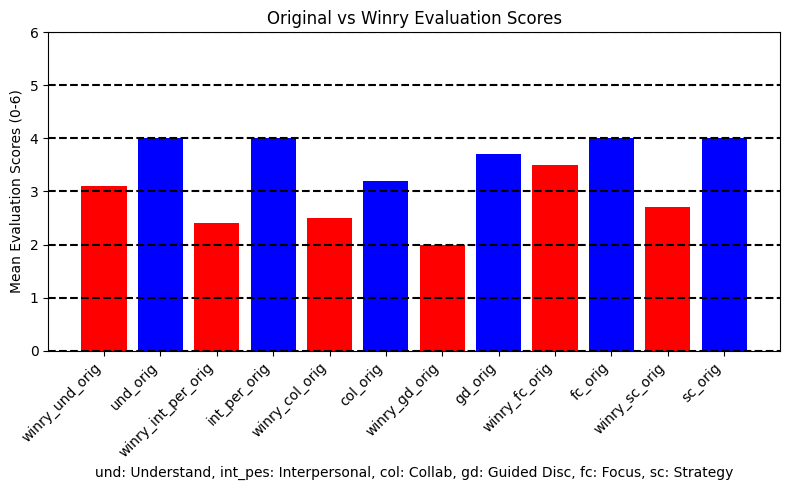

In [ ]:
values = [
            winry_response_eval_mean['understanding_orig'], filtered_response_eval_mean['understanding_orig'],
            winry_response_eval_mean['interpersonal_effectiveness_orig'], filtered_response_eval_mean['interpersonal_effectiveness_orig'],
            winry_response_eval_mean['collaboration_orig'], filtered_response_eval_mean['collaboration_orig'],
            winry_response_eval_mean['guided_discovery_orig'], filtered_response_eval_mean['guided_discovery_orig'],
            winry_response_eval_mean['focus_cognition_orig'], filtered_response_eval_mean['focus_cognition_orig'],
            winry_response_eval_mean['strategy_change_orig'], filtered_response_eval_mean['strategy_change_orig'],
          ]

labels = ['winry_und_orig', 'und_orig',
          'winry_int_per_orig', 'int_per_orig',
          'winry_col_orig', 'col_orig',
          'winry_gd_orig', 'gd_orig',
          'winry_fc_orig', 'fc_orig',
          'winry_sc_orig', 'sc_orig'
         ]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['r','b', 'r','b', 'r','b', 'r','b', 'r','b', 'r','b'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')
plt.axhline(y=4, color='k', linestyle='--')
plt.axhline(y=5, color='k', linestyle='--')
plt.axhline(y=6, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('und: Understand, int_pes: Interpersonal, col: Collab, gd: Guided Disc, fc: Focus, sc: Strategy')
plt.ylabel('Mean Evaluation Scores (0-6)')
plt.ylim(0, 6)
plt.title('Original vs Winry Evaluation Scores (Average)')
plt.tight_layout()
plt.show()

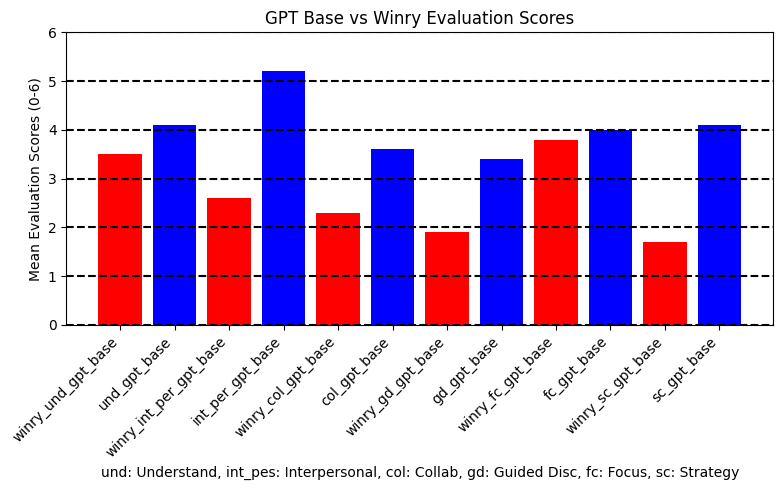

In [70]:
values = [
            winry_response_eval_mean['understanding_gpt_base'], filtered_response_eval_mean['understanding_gpt_base'],
            winry_response_eval_mean['interpersonal_effectiveness_gpt_base'], filtered_response_eval_mean['interpersonal_effectiveness_gpt_base'],
            winry_response_eval_mean['collaboration_gpt_base'], filtered_response_eval_mean['collaboration_gpt_base'],
            winry_response_eval_mean['guided_discovery_gpt_base'], filtered_response_eval_mean['guided_discovery_gpt_base'],
            winry_response_eval_mean['focus_cognition_gpt_base'], filtered_response_eval_mean['focus_cognition_gpt_base'],
            winry_response_eval_mean['strategy_change_gpt_base'], filtered_response_eval_mean['strategy_change_gpt_base']
          ]

labels = ['winry_und_gpt_base', 'und_gpt_base',
          'winry_int_per_gpt_base', 'int_per_gpt_base',
          'winry_col_gpt_base', 'col_gpt_base',
          'winry_gd_gpt_base', 'gd_gpt_base',
          'winry_fc_gpt_base', 'fc_gpt_base',
          'winry_sc_gpt_base', 'sc_gpt_base'
         ]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['r','b', 'r','b', 'r','b', 'r','b', 'r','b', 'r','b'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')
plt.axhline(y=4, color='k', linestyle='--')
plt.axhline(y=5, color='k', linestyle='--')
plt.axhline(y=6, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('und: Understand, int_pes: Interpersonal, col: Collab, gd: Guided Disc, fc: Focus, sc: Strategy')
plt.ylabel('Mean Evaluation Scores (0-6)')
plt.ylim(0, 6)
plt.title('GPT Base vs Winry Evaluation Scores')
plt.tight_layout()
plt.show()

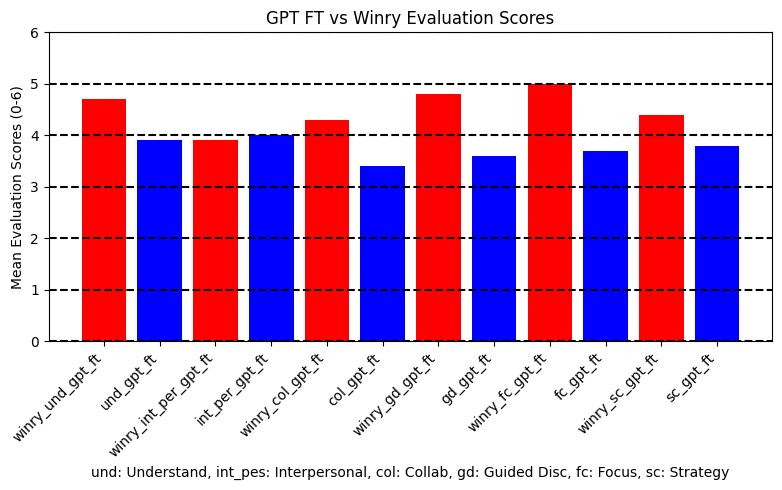

In [71]:
values = [
            winry_response_eval_mean['understanding_gpt_ft'], filtered_response_eval_mean['understanding_gpt_ft'],
            winry_response_eval_mean['interpersonal_effectiveness_gpt_ft'], filtered_response_eval_mean['interpersonal_effectiveness_gpt_ft'],
            winry_response_eval_mean['collaboration_gpt_ft'], filtered_response_eval_mean['collaboration_gpt_ft'],
            winry_response_eval_mean['guided_discovery_gpt_ft'], filtered_response_eval_mean['guided_discovery_gpt_ft'],
            winry_response_eval_mean['focus_cognition_gpt_ft'], filtered_response_eval_mean['focus_cognition_gpt_ft'],
            winry_response_eval_mean['strategy_change_gpt_ft'], filtered_response_eval_mean['strategy_change_gpt_ft']
          ]

labels = ['winry_und_gpt_ft', 'und_gpt_ft',
            'winry_int_per_gpt_ft', 'int_per_gpt_ft',
            'winry_col_gpt_ft', 'col_gpt_ft',
            'winry_gd_gpt_ft', 'gd_gpt_ft',
            'winry_fc_gpt_ft', 'fc_gpt_ft',
            'winry_sc_gpt_ft', 'sc_gpt_ft'
         ]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['r','b', 'r','b', 'r','b', 'r','b', 'r','b', 'r','b'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')
plt.axhline(y=4, color='k', linestyle='--')
plt.axhline(y=5, color='k', linestyle='--')
plt.axhline(y=6, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('und: Understand, int_pes: Interpersonal, col: Collab, gd: Guided Disc, fc: Focus, sc: Strategy')
plt.ylabel('Mean Evaluation Scores (0-6)')
plt.ylim(0, 6)
plt.title('GPT FT vs Winry Evaluation Scores')
plt.tight_layout()
plt.show()

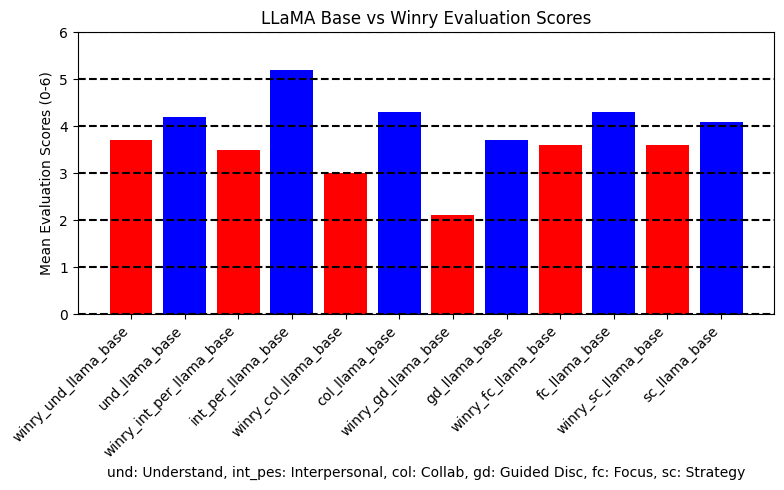

In [72]:
values = [
            winry_response_eval_mean['understanding_llama_base'], filtered_response_eval_mean['understanding_llama_base'],
            winry_response_eval_mean['interpersonal_effectiveness_llama_base'], filtered_response_eval_mean['interpersonal_effectiveness_llama_base'],
            winry_response_eval_mean['collaboration_llama_base'], filtered_response_eval_mean['collaboration_llama_base'],
            winry_response_eval_mean['guided_discovery_llama_base'], filtered_response_eval_mean['guided_discovery_llama_base'],
            winry_response_eval_mean['focus_cognition_llama_base'], filtered_response_eval_mean['focus_cognition_llama_base'],
            winry_response_eval_mean['strategy_change_llama_base'], filtered_response_eval_mean['strategy_change_llama_base']
          ]

labels = ['winry_und_llama_base', 'und_llama_base',
          'winry_int_per_llama_base', 'int_per_llama_base',
          'winry_col_llama_base', 'col_llama_base',
          'winry_gd_llama_base', 'gd_llama_base',
          'winry_fc_llama_base', 'fc_llama_base',
          'winry_sc_llama_base', 'sc_llama_base'
         ]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['r','b', 'r','b', 'r','b', 'r','b', 'r','b', 'r','b'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')
plt.axhline(y=4, color='k', linestyle='--')
plt.axhline(y=5, color='k', linestyle='--')
plt.axhline(y=6, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('und: Understand, int_pes: Interpersonal, col: Collab, gd: Guided Disc, fc: Focus, sc: Strategy')
plt.ylabel('Mean Evaluation Scores (0-6)')
plt.ylim(0, 6)
plt.title('LLaMA Base vs Winry Evaluation Scores')
plt.tight_layout()
plt.show()

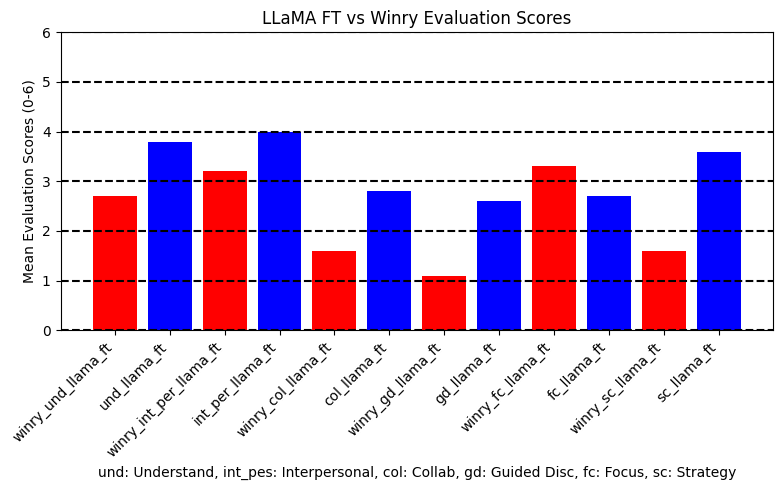

In [73]:
values = [
            winry_response_eval_mean['understanding_llama_ft'], filtered_response_eval_mean['understanding_llama_ft'],
            winry_response_eval_mean['interpersonal_effectiveness_llama_ft'], filtered_response_eval_mean['interpersonal_effectiveness_llama_ft'],
            winry_response_eval_mean['collaboration_llama_ft'], filtered_response_eval_mean['collaboration_llama_ft'],
            winry_response_eval_mean['guided_discovery_llama_ft'], filtered_response_eval_mean['guided_discovery_llama_ft'],
            winry_response_eval_mean['focus_cognition_llama_ft'], filtered_response_eval_mean['focus_cognition_llama_ft'],
            winry_response_eval_mean['strategy_change_llama_ft'], filtered_response_eval_mean['strategy_change_llama_ft']
          ]

labels = ['winry_und_llama_ft', 'und_llama_ft',
          'winry_int_per_llama_ft', 'int_per_llama_ft',
          'winry_col_llama_ft', 'col_llama_ft',
          'winry_gd_llama_ft', 'gd_llama_ft',
          'winry_fc_llama_ft', 'fc_llama_ft',
          'winry_sc_llama_ft', 'sc_llama_ft'
         ]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['r','b', 'r','b', 'r','b', 'r','b', 'r','b', 'r','b'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')
plt.axhline(y=4, color='k', linestyle='--')
plt.axhline(y=5, color='k', linestyle='--')
plt.axhline(y=6, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('und: Understand, int_pes: Interpersonal, col: Collab, gd: Guided Disc, fc: Focus, sc: Strategy')
plt.ylabel('Mean Evaluation Scores (0-6)')
plt.ylim(0, 6)
plt.title('LLaMA FT vs Winry Evaluation Scores')
plt.tight_layout()
plt.show()